In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import *
pd.set_option('precision',3)
%matplotlib inline

In [85]:
df = pd.read_csv('Data/investigate_usage_2017.csv')

In [86]:
df.columns = ['month', 'user_id', 'sessions', 'tvms']
df['power_status'] = df.apply(lambda x: x['sessions']>=3. and x['tvms']>=60*4, axis=1)

(0, 50)

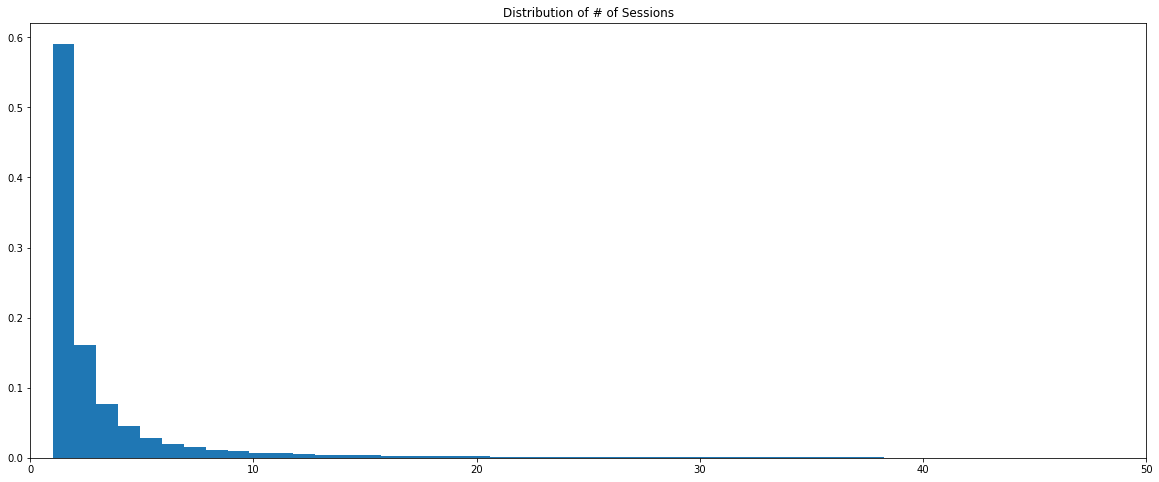

In [91]:
fig = plt.figure(figsize=(20,8))
plt.title('Distribution of # of Sessions')
sessions_mask = df['sessions']<=50
plt.hist(df[sessions_mask]['sessions'], bins=50, normed=True)
plt.xlim(0,50)

In [92]:
# print '# of MONTHLY SESSIONS'
# for i in range(0,105,5):
#     print 'The {}th percentile = {}'.format(i, np.percentile(df2['sessions'],i))

In [93]:
# print 'TOTAL MONTHLY USER DURATION'
# for i in range(0,105,5):
#     print 'The {}th percentile = {}'.format(i, np.percentile(df2['tvms'],i))

### Power User Threshold Slider

Use the slider below to determine a desired threshold for Sessions and TVM.

In [129]:
def f(Sessions, TVH):
    tvm = 60*TVH
    data = dict()
    for i in sorted(df.month.unique()):
#         print 'Month {}'.format(i)
        p = len(df[(df['tvms']>=tvm)&(df['sessions']>=Sessions)&(df['month']==i)])/float(len(df[df['month']==i]))
        p_f = np.round(p, 3)*100
#         print '{}% are Power Users'.format(p_f)
        data[i] = '{}%'.format(p_f)
    return pd.DataFrame(data, index=['% of Power Users'])

widgets.interact(f, Sessions=3, TVH=4, min=0, max=1000)
print 'Column headers are month numbers (e.g. 1 = Jan, 2 = Feb, etc.)'

,1.0,2.0,3.0,4.0,5.0
% of Power Users,12.0%,13.6%,16.0%,16.2%,14.9%


Column headers are month numbers (e.g. 1 = Jan, 2 = Feb, etc.)
